Датасет представляет собой таблицу с данными о фильмах. Цель задачи в предсказании дохода фильма по его бюджету и оценке.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn

data = pd.read_csv('imdb_movies.csv')


In [4]:
data

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US
...,...,...,...,...,...,...,...,...,...,...,...,...
10173,20th Century Women,12/28/2016,73.0,Drama,"In 1979 Santa Barbara, California, Dorothea Fi...","Annette Bening, Dorothea Fields, Lucas Jade Zu...",20th Century Women,Released,English,7000000.0,9.353729e+06,US
10174,Delta Force 2: The Colombian Connection,08/24/1990,54.0,Action,When DEA agents are taken captive by a ruthles...,"Chuck Norris, Col. Scott McCoy, Billy Drago, R...",Delta Force 2: The Colombian Connection,Released,English,9145817.8,6.698361e+06,US
10175,The Russia House,12/21/1990,61.0,"Drama, Thriller, Romance","Barley Scott Blair, a Lisbon-based editor of R...","Sean Connery, Bartholomew 'Barley' Scott Blair...",The Russia House,Released,English,21800000.0,2.299799e+07,US
10176,Darkman II: The Return of Durant,07/11/1995,55.0,"Action, Adventure, Science Fiction, Thriller, ...",Darkman and Durant return and they hate each o...,"Larry Drake, Robert G. Durant, Arnold Vosloo, ...",Darkman II: The Return of Durant,Released,English,116000000.0,4.756613e+08,US


Мы видим, что столбцы имеют имена
*   *names* - название фильма
*   *date_x* - дата выхода фильма
*   *score* - зрительская оценка
*   *genre* - жанр фильма
*   *overview* - описание фильма
*   *crew* - актёрский состав
*   *status* - выпущен фильм в прокат или нет
*   *budget_x* - бюджет фильма (в $)
*   *revenue* - доход (в $)
*   *country* - страна, в которой проводились съёмки





In [5]:
print(data.dtypes)

names          object
date_x         object
score         float64
genre          object
overview       object
crew           object
orig_title     object
status         object
orig_lang      object
budget_x      float64
revenue       float64
country        object
dtype: object


In [6]:
data.describe()

,score,budget_x,revenue
count,10178.000000,1.017800e+04,1.017800e+04
mean,63.497052,6.488238e+07,2.531401e+08
std,13.537012,5.707565e+07,2.777880e+08
min,0.000000,1.000000e+00,0.000000e+00
25%,59.000000,1.500000e+07,2.858898e+07
50%,65.000000,5.000000e+07,1.529349e+08
75%,71.000000,1.050000e+08,4.178021e+08
max,100.000000,4.600000e+08,2.923706e+09


Найдём основные характеристики

Среднее

In [7]:
mean_score = data['revenue'].mean()
mean_score

253140093.41880527

Разброс

In [8]:
std_values = data[['revenue', 'budget_x']].std()
std_values

,0
revenue,2.777880e+08
budget_x,5.707565e+07


Матрица корреляции

In [9]:
corr_mat = data.corr(numeric_only=True)
corr_mat

,score,budget_x,revenue
score,1.000000,-0.23547,0.096533
budget_x,-0.235470,1.00000,0.673830
revenue,0.096533,0.67383,1.000000


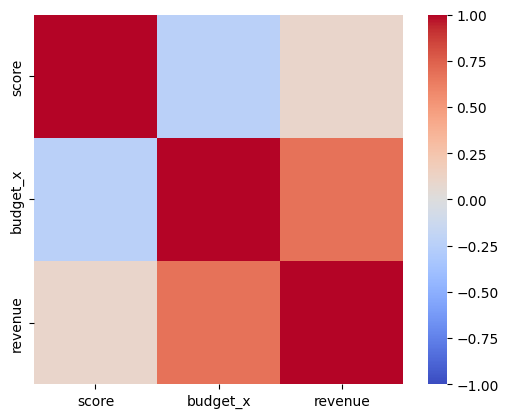

In [ ]:
sns.heatmap(corr_mat, square=True, vmin=-1, vmax=1, cmap='coolwarm')
pass

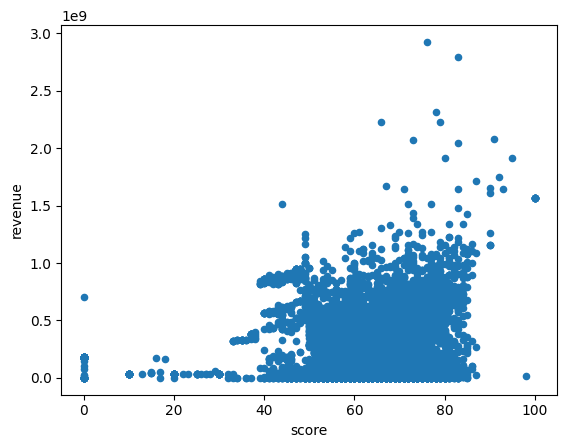

In [10]:
data.plot(kind='scatter', x='score', y='revenue')
pass

Обрабатываем выбросы

In [11]:
data['score'].quantile([0.005, .01, .1, .5, .9, .99, .995])

,score
0.005,0.0
0.010,0.0
0.100,52.0
0.500,65.0
0.900,76.0
0.990,83.0
0.995,85.0


In [12]:
data['revenue'].quantile([0.005, .01, .1, .5, .9, .99, .995])

,revenue
0.005,0.000000e+00
0.010,7.036970e+03
0.100,4.103473e+06
0.500,1.529349e+08
0.900,6.425959e+08
0.990,1.066400e+09
0.995,1.221411e+09


In [13]:
rows_to_drop = data[
    (data['revenue'] < data['revenue'].quantile(0.005)) | (data['revenue'] > data['revenue'].quantile(0.995)) |
    (data['score']  < data['score'].quantile(0.005)) | (data['score']  > data['score'].quantile(0.995))].index
data_raw = data.drop(rows_to_drop)
data_raw.shape

(10112, 12)

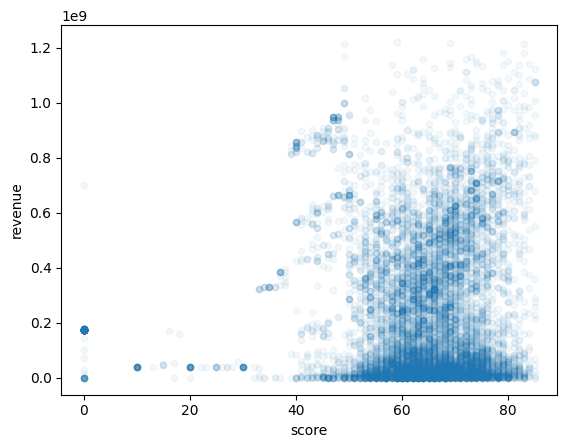

In [14]:
data_raw.plot(kind = 'scatter', x = 'score', y = 'revenue', alpha=.05)
pass

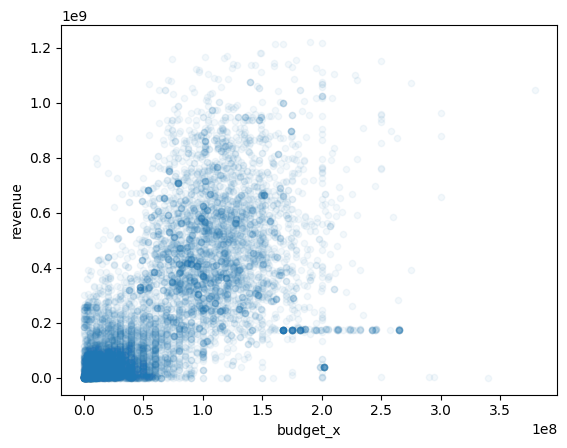

In [15]:
data_raw.plot(kind = 'scatter', x = 'budget_x', y = 'revenue', alpha=.05)
pass

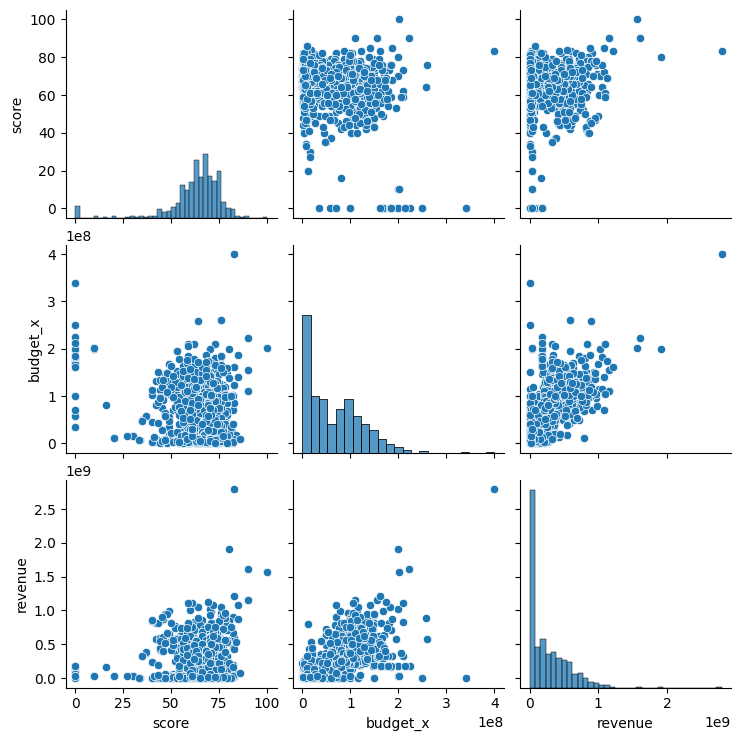

In [16]:
sns.pairplot(data.sample(1000), diag_kind='hist')
pass

Находим пропущенные значения

In [17]:
data_raw.isnull().sum()

,0
names,0
date_x,0
score,0
genre,80
overview,0
crew,56
orig_title,0
status,0
orig_lang,0
budget_x,0


Обработка пропущенных значений

In [19]:
data_raw['genre'].fillna("Unknown", inplace=True)

In [21]:
data_raw['crew'].fillna("Unknown", inplace=True)

In [22]:
data_raw.isnull().sum()

,0
names,0
date_x,0
score,0
genre,0
overview,0
crew,0
orig_title,0
status,0
orig_lang,0
budget_x,0


Отбор признаков

In [23]:
data_raw.columns

Index(['names', 'date_x', 'score', 'genre', 'overview', 'crew', 'orig_title',
       'status', 'orig_lang', 'budget_x', 'revenue', 'country'],
      dtype='object')

In [24]:
X = data_raw.drop(['revenue', 'names', 'date_x', 'genre', 'overview', 'crew', 'orig_title', 'status', 'orig_lang', 'country'], axis=1)
y = data_raw['revenue']

Разбиваем на обучающую и тестовую выборки

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

N_train, N_test

(7584, 2528)

Линейная регрессия

In [26]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [27]:
y_train_predict = lr_model.predict(X_train)
y_test_predict  = lr_model.predict(X_test)

In [28]:
lr_model.coef_

array([4.84768170e+06, 3.38699582e+00])

In [29]:
from sklearn.metrics import mean_squared_error, r2_score

MSE_train = mean_squared_error(y_train, y_train_predict)
MSE_test  = mean_squared_error(y_test,  y_test_predict)
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

MSE_train, MSE_test, R2_train, R2_test

(3.427617429122365e+16,
 3.0332649793337e+16,
 0.5026664074063526,
 0.5062650394838966)

In [30]:
lr_model.score(X_train, y_train)

0.5026664074063526

In [31]:
lr_model.score(X_test, y_test)

0.5062650394838966

In [32]:
MSE_train = np.mean((y_train_predict - y_train)**2)
MSE_test  = np.mean((y_test_predict - y_test)**2)
MSE_train, MSE_test

(3.427617429122365e+16, 3.0332649793337e+16)

In [33]:
np.sqrt(MSE_train), np.sqrt(MSE_test)

(185138257.23286813, 174162710.6855454)

Такие получились отклонения на обучающей и тестовой выборке. Очевидно, что сложно предсказать доход фильма по тем признакам, которые есть в датасете

Как зависит доход от оценки?

In [34]:
lr_model = LinearRegression()
lr_model.fit(X_train[['score']], y_train)

y_train_predict = lr_model.predict(X_train[['score']])
y_test_predict  = lr_model.predict(X_test[['score']])

In [35]:
MSE_train = mean_squared_error(y_train, y_train_predict)
MSE_test  = mean_squared_error(y_test,  y_test_predict)

In [36]:
np.sqrt(MSE_train), np.sqrt(MSE_test)

(261870920.43070704, 247745019.5028517)

Ошибка заметно выросла

Как зависит доход от бюджета?

In [37]:
lr_model = LinearRegression()
lr_model.fit(X_train[['budget_x']], y_train)

y_train_predict = lr_model.predict(X_train[['budget_x']])
y_test_predict  = lr_model.predict(X_test[['budget_x']])

In [38]:
MSE_train = mean_squared_error(y_train, y_train_predict)
MSE_test  = mean_squared_error(y_test,  y_test_predict)

In [39]:
np.sqrt(MSE_train), np.sqrt(MSE_test)

(195650262.7630714, 186388850.8834548)

Здесь тоже ошибка больше

### Выводы
Оценка дохода фильма с использованием линейной регрессии по бюджету и зрительской оценке дает неоднозначные результаты и требует дальнейшего анализа. Линейная регрессия предполагает линейную зависимость между бюджетом/рейтингом и доходом. На практике эта зависимость часто бывает нелинейной. Увеличение бюджета не всегда приводит к пропорциональному увеличению дохода, а очень высокие рейтинги могут не гарантировать пропорционально высокий доход. Для более точной оценки дохода фильма можно использовать более сложные методы машинного обучения.